# Import neccesary packages

In [73]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras as keras
import pandas as pd

### Loading data
There are four dataframes named 'reg#.csv' in synth_data.

In [88]:
df=pd.read_csv('./synth_data/reg0.csv')
x,y=df['x'].values,df['y'].values
print (type(x),x.shape,type(y),y.shape)

<class 'numpy.ndarray'> (10000,) <class 'numpy.ndarray'> (10000,)


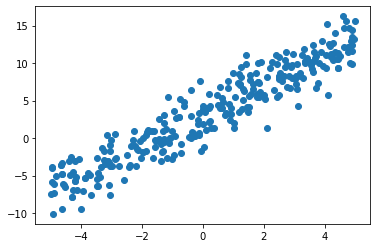

In [89]:
choice=np.random.choice(np.arange(len(x)),300)
plt.scatter(x[choice],y[choice])

In [90]:
def linear(a,b,x):
    return a*x+b
def mse_loss(a,b):
    return np.mean((linear(a,b,x)-y)**2)

In [91]:
tf_x,tf_y=tf.constant(x,dtype=tf.float32),tf.constant(y,dtype=tf.float32)

## Problem definition
We are given a dataset which we have loaded above, and want to find a linear function which best fits the data. 
Due to the presence of noise, it may not be straightforward to notice the relationship between the dependent variabe $y$ and the independent variable $x$. We now define a linear relationship between these two as 
\begin{equation}
\hat{y}=ax+b
\end{equation} 
The values of $a$ and $b$ are unknown and have to be fixed by minimizing the eror between $\hat{y}$ the model (the linear expression written above) predicted value and $y$, the value given in the dataset. Any function which is a well-defined metric suffices as the loss function, the most used is the meas squared error defined as 
\begin{equation}
L(a,b)= \frac{1}{N} \sum_{i=1}^{i=N} \;(\hat{y}(x_i,a,b)-y_i)^2
\end{equation} 

In [92]:
variables={'a': tf.Variable(np.random.uniform(-10,10),dtype=tf.float32),
    'b': tf.Variable(np.random.uniform(-10,10),dtype=tf.float32)
}
lr=0.0001
loss_threshold=0.001
verbose_freq=1000
variables

{'a': <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-4.496223>,
 'b': <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-7.584229>}

### Gradient Descent
\begin{equation}
\omega_{t+1}=\omega_t-\gamma \frac{\partial L}{\partial \omega_t}
\end{equation} 
$\gamma$ is the learning rate and $\omega$ represents either $a$ or $b$.

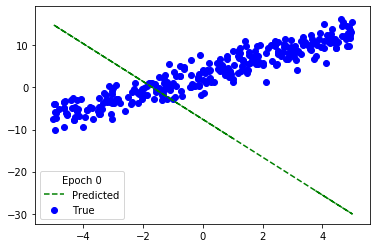

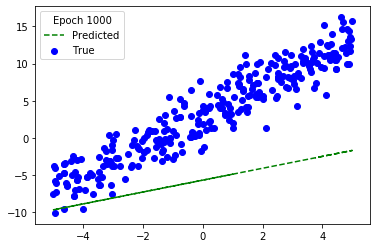

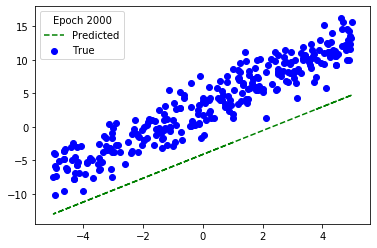

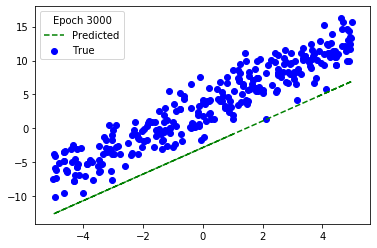

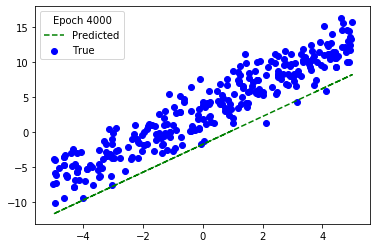

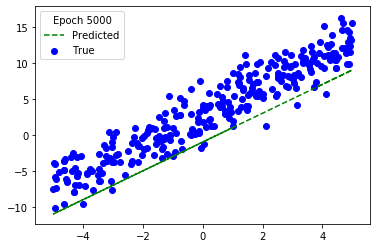

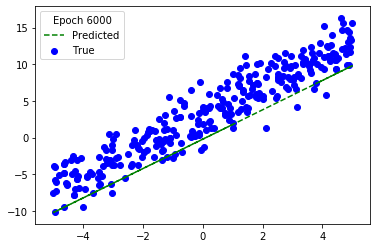

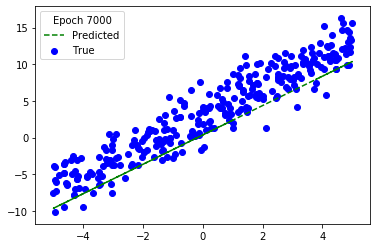

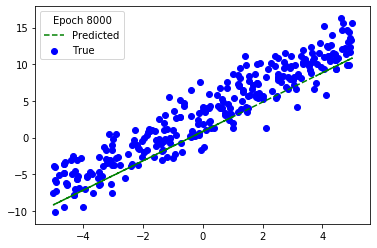

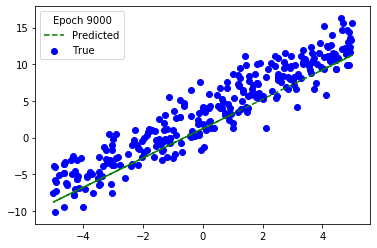

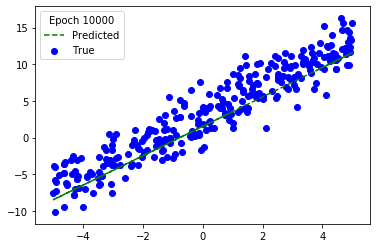

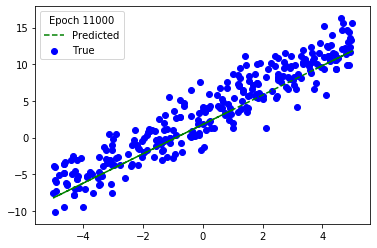

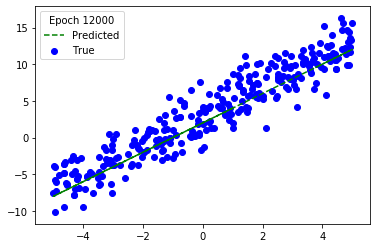

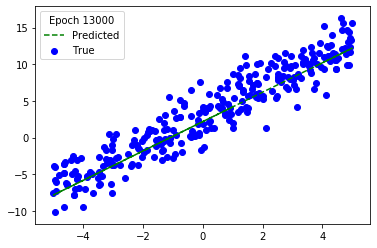

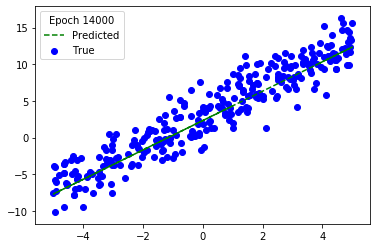

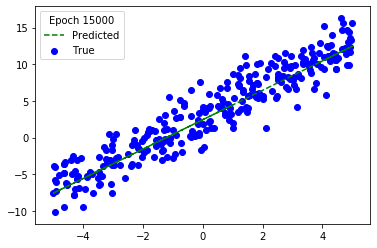

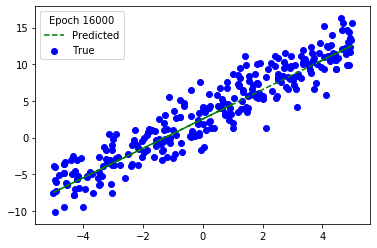

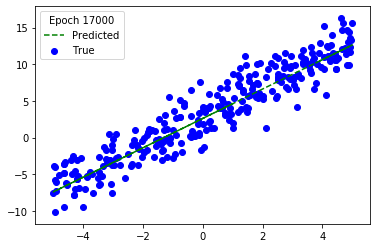

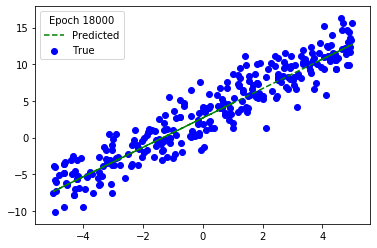

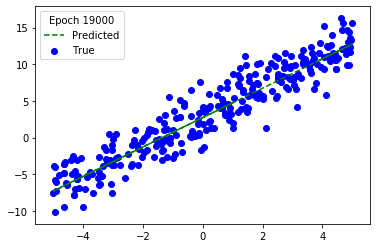

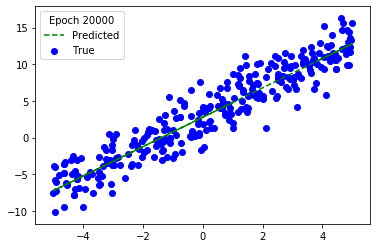

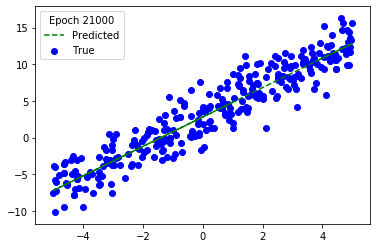

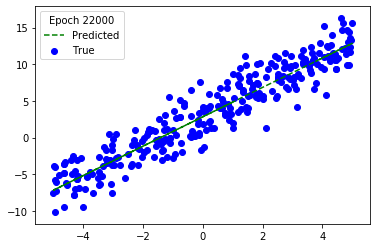

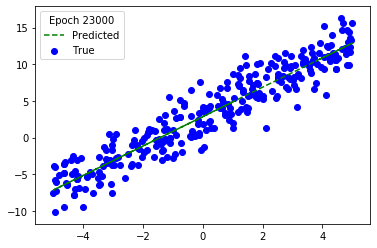

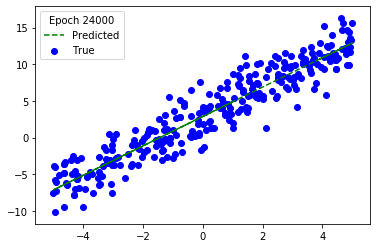

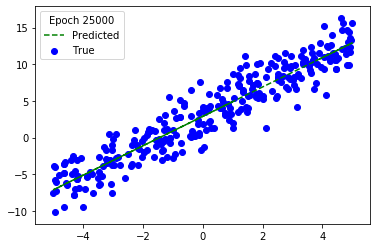

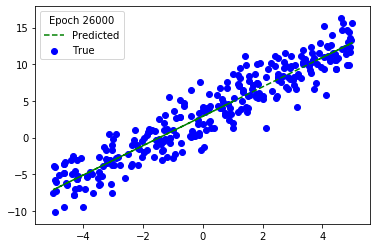

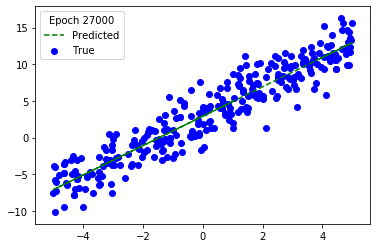

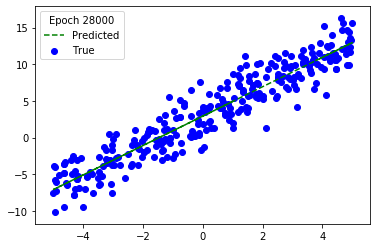

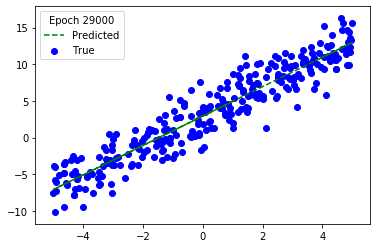

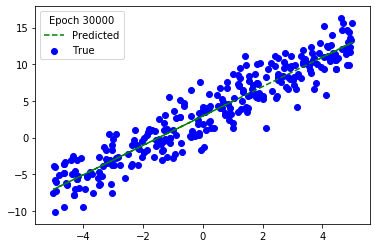

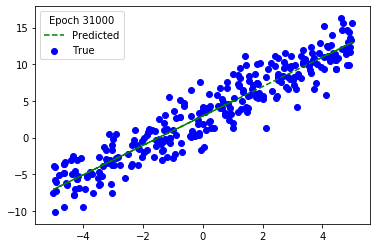

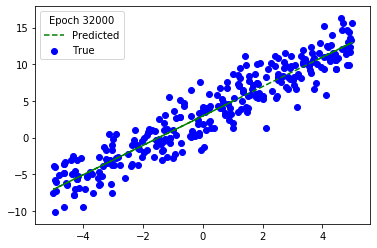

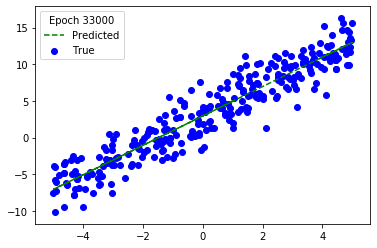

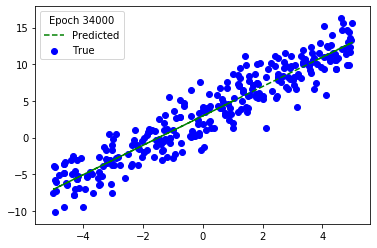

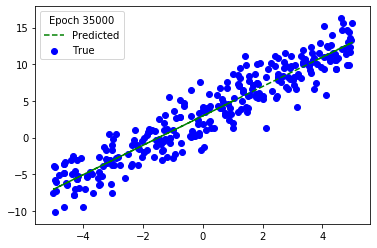

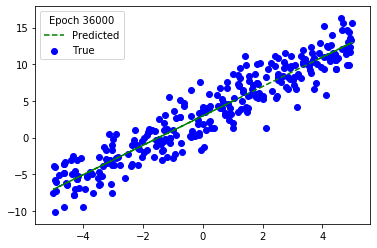

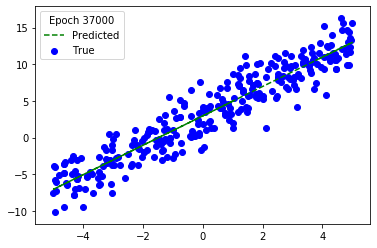

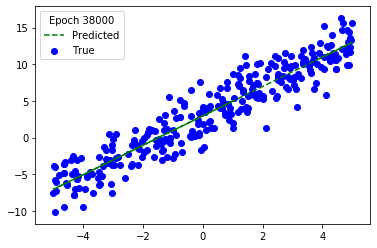

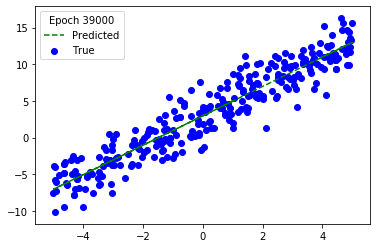

In [ ]:
for i in range(100000):
    with tf.GradientTape() as tape:
        y_pred=linear(variables['a'],variables['b'],tf_x)
        loss=tf.math.reduce_mean((y_pred-tf_y)**2)
        grad = tape.gradient(loss, variables)
    variables['a'].assign(variables['a']-lr*grad['a'])
    variables['b'].assign(variables['b']-lr*grad['b'])
    if loss<loss_threshold:
        break
    if (i)%verbose_freq==0:
        #print ('Loss: ',
        plt.plot(tf_x.numpy(),y_pred.numpy(),'--g',label='Predicted',linewidth=1.5)
        plt.scatter(tf_x.numpy()[choice],tf_y.numpy()[choice],c='b',label='True')
        plt.legend(title=f"Epoch {i}")
        plt.show()
print ('Converged...\n\t loss:',loss.numpy(),'a:',variables['a'].numpy(),'b:',variables['b'].numpy())